/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


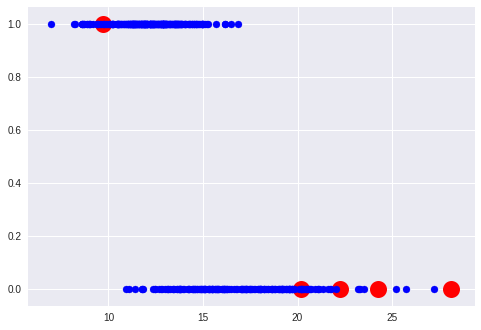

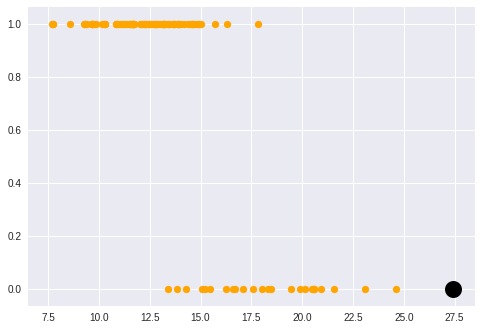

In [7]:
# Anomaly Detection - Machine Learning Tutorial

##############################################################

from sklearn import datasets, ensemble
import matplotlib.pyplot as plt
import pandas as pd

##############################################################

cancer_data = datasets.load_breast_cancer()

features = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names)

targets = pd.DataFrame(cancer_data.target)

training_data = features[0:455]
test_data = features[455:]

##############################################################

our_anomaly_detector = ensemble.IsolationForest(contamination = 0.01)

our_anomaly_detector.fit(training_data)

##############################################################

training_predictions = our_anomaly_detector.predict(training_data)
test_predictions = our_anomaly_detector.predict(test_data)

feature_selected = "mean radius"

training_targets = targets[0:455]
test_targets = targets[455:]

for training_index in range(len(training_data)):
    if training_predictions[training_index]==1:
        plt.scatter(training_data[feature_selected][training_index], training_targets[0][training_index],c="blue")
    else:
        plt.scatter(training_data[feature_selected][training_index], training_targets[0][training_index],c="red",linewidths=10)
        
plt.show()

for test_index in range(len(test_data)):
    test_index_adj = test_index + 455
    if test_predictions[test_index]==1:
        plt.scatter(test_data[feature_selected][test_index_adj], test_targets[0][test_index_adj],c="orange")
    else:
        plt.scatter(test_data[feature_selected][test_index_adj], test_targets[0][test_index_adj],c="black",linewidths=10)
        
plt.show()